In [7]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines3 gym-anytrading gym
!pip install stable-baselines3[mpi]
!pip install git+https://github.com/hill-a/stable-baselines

  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.19.0
    Uninstalling gym-0.19.0:
      Successfully uninstalled gym-0.19.0


  Cloning https://github.com/hill-a/stable-baselines to c:\users\ayoki\appdata\local\temp\pip-req-build-uyx5k6sd


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [1]:
!pip install gym==0.19.0
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines import PPO1
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\ayoki\OneDrive\Documents\anaconda\envs\tf\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
df = pd.read_csv('C:/Users/ayoki/Downloads/GME (daily from 2008 jan).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2008,62.150002,62.290001,59.240002,60.299999,40.599995,2349700
1,03/01/2008,60.299999,61.410000,59.750000,60.110001,40.472069,2460800
2,04/01/2008,58.950001,58.950001,56.730000,57.040001,38.405041,4017600
3,07/01/2008,56.549999,57.900002,55.849998,56.520000,38.054920,3302200
4,08/01/2008,57.049999,59.090000,55.860001,56.099998,37.772144,3221600


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [4]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-02-01,62.150002,62.290001,59.240002,60.299999,40.599995,2349700
2008-03-01,60.299999,61.410000,59.750000,60.110001,40.472069,2460800
2008-04-01,58.950001,58.950001,56.730000,57.040001,38.405041,4017600
2008-07-01,56.549999,57.900002,55.849998,56.520000,38.054920,3302200
2008-08-01,57.049999,59.090000,55.860001,56.099998,37.772144,3221600


In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,10), window_size=5)

In [9]:
env.signal_features

array([[60.299999,  0.      ],
       [60.110001, -0.189998],
       [57.040001, -3.07    ],
       [56.52    , -0.520001],
       [56.099998, -0.420002],
       [55.110001, -0.989997],
       [52.27    , -2.840001],
       [52.119999, -0.150001],
       [53.709999,  1.59    ],
       [50.810001, -2.899998]])

info {'total_reward': -0.15000100000000316, 'total_profit': 0.9822231684513104, 'position': 1}


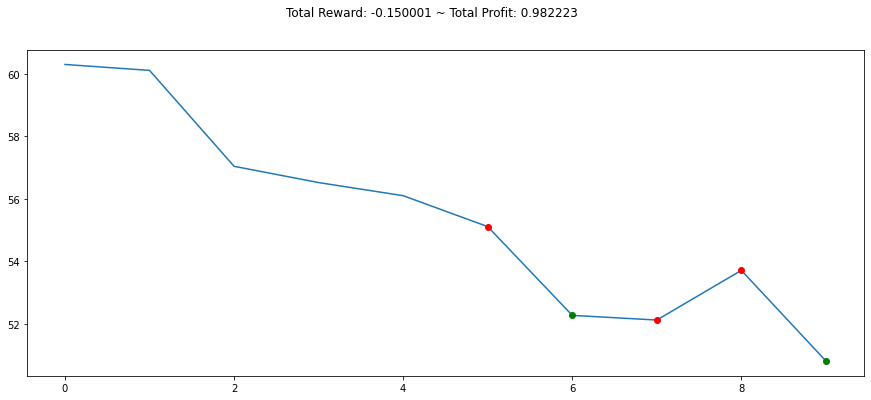

In [10]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [11]:
!pip install finta

In [12]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [13]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [14]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2008-02-01,62.150002,62.290001,59.240002,60.299999,40.599995,2349700,0.000000,0.000000,0.0
2008-03-01,60.299999,61.410000,59.750000,60.110001,40.472069,2460800,0.000000,0.000000,-2460800.0
2008-04-01,58.950001,58.950001,56.730000,57.040001,38.405041,4017600,0.000000,0.000000,-6478400.0
2008-07-01,56.549999,57.900002,55.849998,56.520000,38.054920,3302200,0.000000,0.000000,-9780600.0
2008-08-01,57.049999,59.090000,55.860001,56.099998,37.772144,3221600,0.000000,0.000000,-13002200.0
2008-09-01,55.959999,56.599998,52.990002,55.110001,37.105572,6529700,0.000000,0.000000,-19531900.0
2008-10-01,54.130001,55.049999,50.250000,52.270000,35.193394,10015000,0.000000,0.000000,-29546900.0
2008-11-01,52.000000,53.500000,51.599998,52.119999,35.092403,4961500,0.000000,0.000000,-34508400.0
2008-01-14,52.340000,53.980000,52.279999,53.709999,36.162945,3319400,0.000000,20.587647,-31189000.0


In [15]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [16]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=5, frame_bound=(5,1000))

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2008-02-01,62.150002,62.290001,59.240002,60.299999,40.599995,2349700,0.0,0.0,0.0
2008-03-01,60.299999,61.410000,59.750000,60.110001,40.472069,2460800,0.0,0.0,-2460800.0
2008-04-01,58.950001,58.950001,56.730000,57.040001,38.405041,4017600,0.0,0.0,-6478400.0
2008-07-01,56.549999,57.900002,55.849998,56.520000,38.054920,3302200,0.0,0.0,-9780600.0
2008-08-01,57.049999,59.090000,55.860001,56.099998,37.772144,3221600,0.0,0.0,-13002200.0


In [18]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [23]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | 0.0829   |
| fps                | 38       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.0577   |
---------------------------------
---------------------------------
| explained_variance | -0.691   |
| fps                | 1274     |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.393    |
| fps                | 1523     |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 0.0217   |
---------------------------------
---------------------------------
| explained_variance | 0.336    |
| fps                | 1628     |
| nupdates           | 300      |
| policy_entr

---------------------------------
| explained_variance | -2.75    |
| fps                | 1818     |
| nupdates           | 3000     |
| policy_entropy     | 0.411    |
| total_timesteps    | 15000    |
| value_loss         | 0.0821   |
---------------------------------
---------------------------------
| explained_variance | -0.0444  |
| fps                | 1819     |
| nupdates           | 3100     |
| policy_entropy     | 0.53     |
| total_timesteps    | 15500    |
| value_loss         | 0.133    |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 1821      |
| nupdates           | 3200      |
| policy_entropy     | 0.326     |
| total_timesteps    | 16000     |
| value_loss         | 2.38      |
----------------------------------
---------------------------------
| explained_variance | 0.236    |
| fps                | 1821     |
| nupdates           | 3300     |
| policy_entropy     | 0.495    |
| tota

---------------------------------
| explained_variance | -0.208   |
| fps                | 1824     |
| nupdates           | 6100     |
| policy_entropy     | 0.565    |
| total_timesteps    | 30500    |
| value_loss         | 0.00111  |
---------------------------------
---------------------------------
| explained_variance | -0.693   |
| fps                | 1824     |
| nupdates           | 6200     |
| policy_entropy     | 0.141    |
| total_timesteps    | 31000    |
| value_loss         | 0.000509 |
---------------------------------
---------------------------------
| explained_variance | 0.406    |
| fps                | 1825     |
| nupdates           | 6300     |
| policy_entropy     | 0.414    |
| total_timesteps    | 31500    |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | -0.0483  |
| fps                | 1825     |
| nupdates           | 6400     |
| policy_entropy     | 0.688    |
| total_timest

---------------------------------
| explained_variance | 0.00533  |
| fps                | 1830     |
| nupdates           | 9200     |
| policy_entropy     | 0.206    |
| total_timesteps    | 46000    |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 1829     |
| nupdates           | 9300     |
| policy_entropy     | 0.683    |
| total_timesteps    | 46500    |
| value_loss         | 0.00343  |
---------------------------------
---------------------------------
| explained_variance | -24.6    |
| fps                | 1829     |
| nupdates           | 9400     |
| policy_entropy     | 0.269    |
| total_timesteps    | 47000    |
| value_loss         | 0.229    |
---------------------------------
---------------------------------
| explained_variance | -0.688   |
| fps                | 1829     |
| nupdates           | 9500     |
| policy_entropy     | 0.218    |
| total_timest

---------------------------------
| explained_variance | -0.0282  |
| fps                | 1822     |
| nupdates           | 12300    |
| policy_entropy     | 0.505    |
| total_timesteps    | 61500    |
| value_loss         | 0.0531   |
---------------------------------
---------------------------------
| explained_variance | 0.151    |
| fps                | 1822     |
| nupdates           | 12400    |
| policy_entropy     | 0.415    |
| total_timesteps    | 62000    |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 1823     |
| nupdates           | 12500    |
| policy_entropy     | 0.264    |
| total_timesteps    | 62500    |
| value_loss         | 0.00177  |
---------------------------------
---------------------------------
| explained_variance | 0.451    |
| fps                | 1823     |
| nupdates           | 12600    |
| policy_entropy     | 0.498    |
| total_timest

---------------------------------
| explained_variance | -1.8     |
| fps                | 1829     |
| nupdates           | 15400    |
| policy_entropy     | 0.136    |
| total_timesteps    | 77000    |
| value_loss         | 0.00289  |
---------------------------------
---------------------------------
| explained_variance | -0.677   |
| fps                | 1829     |
| nupdates           | 15500    |
| policy_entropy     | 0.265    |
| total_timesteps    | 77500    |
| value_loss         | 0.0442   |
---------------------------------
---------------------------------
| explained_variance | -1.71    |
| fps                | 1829     |
| nupdates           | 15600    |
| policy_entropy     | 0.232    |
| total_timesteps    | 78000    |
| value_loss         | 0.00227  |
---------------------------------
---------------------------------
| explained_variance | -0.0257  |
| fps                | 1829     |
| nupdates           | 15700    |
| policy_entropy     | 0.153    |
| total_timest

---------------------------------
| explained_variance | -0.612   |
| fps                | 1830     |
| nupdates           | 18500    |
| policy_entropy     | 0.104    |
| total_timesteps    | 92500    |
| value_loss         | 0.00863  |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 1830     |
| nupdates           | 18600    |
| policy_entropy     | 0.145    |
| total_timesteps    | 93000    |
| value_loss         | 0.00371  |
---------------------------------
---------------------------------
| explained_variance | -92.3    |
| fps                | 1830     |
| nupdates           | 18700    |
| policy_entropy     | 0.1      |
| total_timesteps    | 93500    |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.818    |
| fps                | 1831     |
| nupdates           | 18800    |
| policy_entropy     | 0.0768   |
| total_timest

In [24]:
env = MyCustomEnv(df=df, window_size=5, frame_bound=(1000,1050))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.33000000000000185, 'total_profit': 0.8457671525427234, 'position': 0}


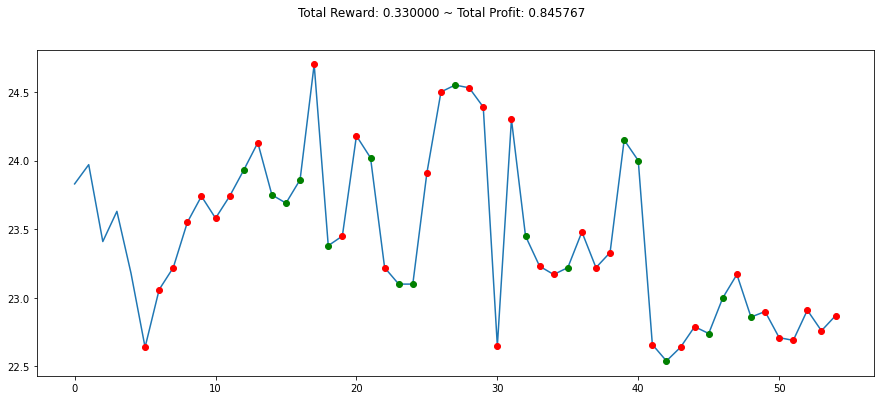

In [25]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()